In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collecting and Processing

In [7]:
calories_data= pd.read_csv('/content/calories.csv')

In [8]:
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [9]:
calories_data.shape

(15000, 2)

In [10]:
excercise_data= pd.read_csv('/content/exercise.csv')

In [11]:
excercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [12]:
excercise_data.shape

(15000, 8)

In [13]:
calories_data= calories_data.drop('User_ID', axis=1)   # Dropping the user_id column from the calories data

In [14]:
calories_data.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [15]:
new_data= pd.concat([excercise_data, calories_data], axis=1)    # Joining the exercise and calories data to form a new data

In [16]:
new_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [17]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Data Analysis

In [18]:
new_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualisation

In [19]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

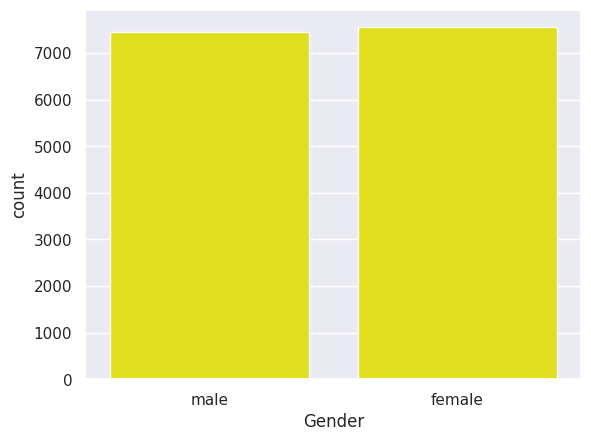

In [20]:
sns.countplot(x='Gender', color='yellow', data=new_data)

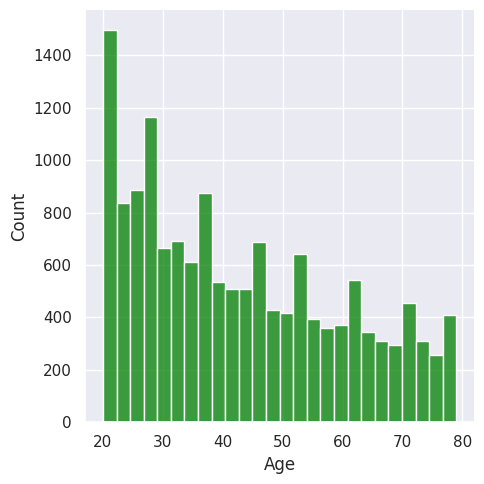

In [21]:
# Finding the distribution of Age column

sns.displot(x='Age', data=new_data, color='green')

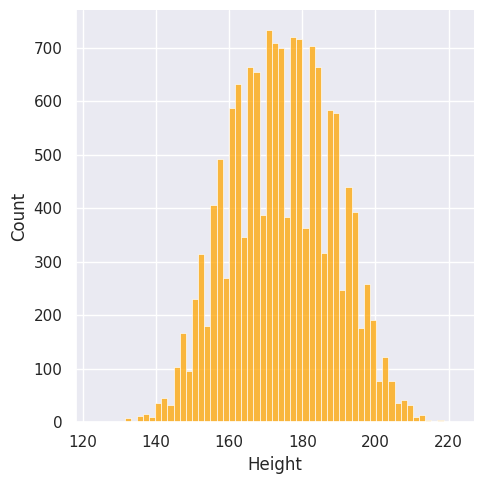

In [22]:
sns.displot(x='Height', color='orange', data=new_data)

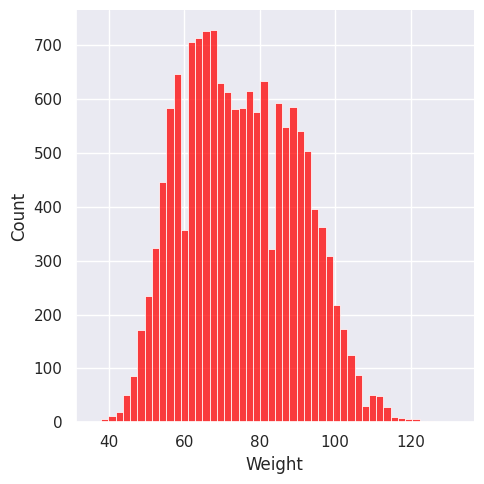

In [23]:
sns.displot(x='Weight', color='red', data=new_data)

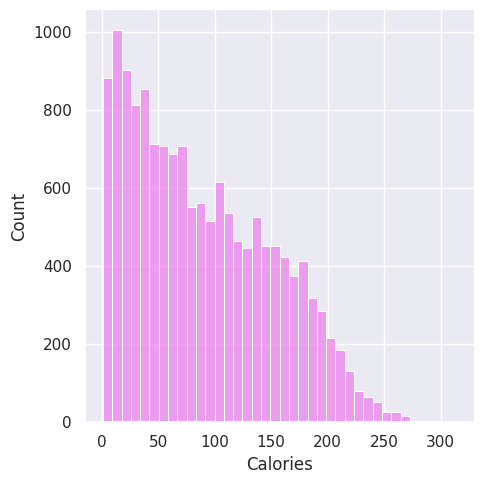

In [24]:
sns.displot(x='Calories', color='violet',  data=new_data)

Finding the correleation in the dataset

In [25]:
# Converting the 'Gender' column to numerical values using one-hot encoding
new_data['Gender'] = new_data['Gender'].apply(lambda x: 0 if x == 'male' else 1)

# Calculating the correlation
correlation = new_data.corr()

<Axes: >

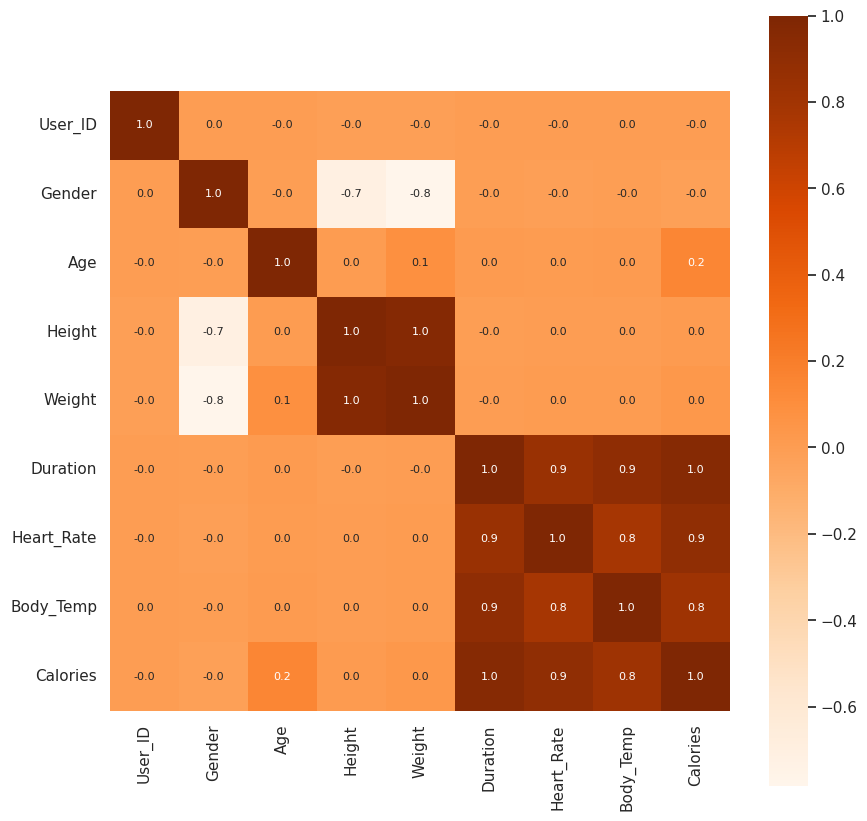

In [26]:
# Constructing the heatmap to understand the Correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Oranges')

The Dark squares tell us that these columns are highly correlated and the light squares tells us values are coorelated that much.

+ve value tells us that these columns are directly proportional.
-ve values tells us that these columns are inversly proportional.

In [27]:
X= new_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y= new_data['Calories']

In [28]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


Splitting our data into Training data and Test data

In [29]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [31]:
# Loading our model

model=XGBRegressor()

In [32]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluating our model

In [33]:
X_test_prediction= model.predict(X_test)

In [34]:
print(X_test_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


Mean Absolute Error

In [35]:
mae= metrics.mean_absolute_error(Y_test, X_test_prediction)

In [36]:
print("Mean absolute error is :", mae)

Mean absolute error is : 1.4833678883314132


In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [48]:
xgb_param_grid= {
    "learning_rate":np.linspace(0.1, 0.2, 5),
    "n_estimators":[100, 200, 300],
    "max_depth": np.linspace(3, 9, 5, dtype=int),
    "colsample_bytree": np.linspace(0.5, 0.9, 5)
}

In [49]:
random_search_xgb= RandomizedSearchCV(estimator=model, param_distributions=xgb_param_grid, n_iter=10, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
random_search_xgb.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': array([0.1  , 0.125, 0.15 , 0.175, 0.2  ]),
                                        'max_depth': array([3, 4, 6, 7, 9]),
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [50]:
random_search_xgb.best_params_

{'n_estimators': 200,
 'max_depth': np.int64(7),
 'learning_rate': np.float64(0.17500000000000002),
 'colsample_bytree': np.float64(0.9)}

In [51]:
random_search_xgb.best_score_

np.float64(-1.231190532607337)

In [52]:
# Create a new model with the best parameters
best_xgb_model = XGBRegressor(n_estimators=200,
                              max_depth=7,
                              learning_rate=0.175,
                              colsample_bytree=0.9)

# Fit the new model to the training data
best_xgb_model.fit(X_train, Y_train)

# Make predictions on the test data
new_predictions = best_xgb_model.predict(X_test)

# Calculate the new mean absolute error
new_mae = metrics.mean_absolute_error(Y_test, new_predictions)

print("Original Mean Absolute Error:", mae)
print("New Mean Absolute Error:", new_mae)

Original Mean Absolute Error: 1.4833678883314132
New Mean Absolute Error: 1.1226010751525561


As we can see from the output, the new mean absolute error is approximately 1.12, which is a significant improvement over the original mean absolute error of 1.48. So, by tuning the hyperparameters, we've created a more accurate model for predicting calorie burn.

In [54]:
import pickle

# open a file, where we want to store the data
file = open('calorie_model.pkl', 'wb')

# dump information to that file
pickle.dump(best_xgb_model, file)